<a href="https://colab.research.google.com/github/nascimento-luciano/Artificial-Intelligence/blob/master/pre_processamento_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Redes Neurais/Aprendizagem de Máquina - Prof. Dr. Luis F. Alves Pereira**

---
**Conteúdo:**

* Carregamento de dados
* Pré-processamento de dados 
    * Dados ausentes
    * Dados fora de escala
    * Representação de dados categóricos


---


#1. Carregamento dos dados


Neste exemplo usaremos a base dados **Titanic** que está armazenada em um repositório **git**. Essa coleção de dados contém o registro de um grupo passageiros da primeira e única viagem do navio Titanic. Mais informações sobre os dados podem ser encontrados [aqui](https://www.kaggle.com/c/titanic).




In [ ]:
!mkdir ./data_exp/
!git clone https://gist.github.com/0e94a01bd6db87d666866b56f25556d0.git ./data_exp/

Cloning into './data_exp'...
remote: Enumerating objects: 9, done.
remote: Total 9 (delta 0), reused 0 (delta 0), pack-reused 9
Unpacking objects: 100% (9/9), done.


Para trabalhar com uma base de dados em formato **csv**, podemos carregá-la em memória usando o método **red_csv** da biblioteca **pandas**.

Com a base de dados carregada em memória, podemos ter uma visualização rápida dos **n** primeiros registros usando o método **head**.

In [ ]:
import pandas as pd
data = pd.read_csv("./data_exp/titanic.csv")

print('A base possui um total de {} registros. Os 30 primeiros são:'.format(len(data)))
data.head(30)

A base possui um total de 891 registros. Os 30 primeiros são:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


#2.Pré-processamento de dados

Os dados brutos geralmente não estão prontos para serem analisados e processados por ferramentas e técnicas estatísticas e de aprendizagem de máquina. Os principais problemas que encontramos ao iniciar um trabalho com uma nova base de dados são: **dados ausentes** e **dados fora de escala**. 

###2.1. Dados ausentes

Para checar se nossa base possui dados ausentes, podemos usar o metodo *Pandas.DataFrame.isna()* que retorna **True** para as células da base com valor **NaN**:




In [ ]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Para remover os dados ausentes podemos usar duas abordagens: **descartar dados** ou **substituir dados ausentes**.

####2.1.1. Descarte de dados

Podemos descartar *(i)* todo um registro/exemplo (linha) da base que contém ao menos um dado ausente ou *(ii)* todas as features (coluna) que contém ao menos um dado ausente.

#####2.1.1.1. Descarte de registros com dados ausentes

Para isso, utilizamos o método *Pandas.DataFrame.dropna()* com o parâmetro **axis** igual a 0.

In [ ]:
data = data.dropna(axis=0)
print('A base possui um total de {} registros. Os 5 primeiros são:'.format(len(data)))
data.head(5)

A base possui um total de 183 registros. Os 5 primeiros são:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


Checagem de valores **NaN** na base:

In [ ]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

É possível ser um pouco mais específico e aplicar o descarte de registros apenas a um subconjunto da base. Veja o exemplo a seguir que elimina apenas os registros em que a idade é desconhecida.

In [ ]:
data = pd.read_csv("./data_exp/titanic.csv") #necessário recarregar a base pois os valores NaN foram eliminados anteriormente
data = data.dropna(subset=['Age'],axis=0)
print('A base possui um total de {} registros. Os 5 primeiros são:'.format(len(data)))
data.head(5)

A base possui um total de 714 registros. Os 5 primeiros são:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Checagem de valores **NaN** na base:

In [ ]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          529
Embarked         2
dtype: int64

#####2.1.1.2. Descarte de colunas com dados ausentes

Para isso, utilizamos o método **dropna** com o parâmetro **axis** igual a 1.

In [ ]:
data = pd.read_csv("./data_exp/titanic.csv") #necessário recarregar a base pois os valores NaN foram eliminados anteriormente
data = data.dropna(axis=1)
print('A base possui um total de {} registros. Os 5 primeiros são:'.format(len(data)))
data.head(5)

A base possui um total de 891 registros. Os 5 primeiros são:


,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500


Checagem de valores **NaN** na base:

In [ ]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
dtype: int64

####2.1.2. Substituição de dados

Também é possível substuir os dados ausentes para evitar o descarte de dados. No entanto, essa opção está associada a uma questão fundamental: qual valor deve ser inserido para substituir um dado ausente? A solução depende do tipo de dado em questão:

* para **atributos numéricos**, pode-se substituir o valor ausente pela média da medida encontrada ao longo de toda a base;
* para **atributos categóricos**, pode-se substituir o valor ausente pelo valor mais frequente encontrado ao longo de toda a base; 

No próximo código, os valores NaN em todos os atributos numéricos da base são substituídos pela média dos valores das colunas.

Veja que, através do método *Pandas.DataFrame.fillna()* é possível indicar o novo valor que irá substituir os NaNs (ou dict/DataFrames que especifiquem o novo valor para cada atributo da base).



In [ ]:
#necessário recarregar a base pois os valores NaN foram eliminados anteriormente
data = pd.read_csv("./data_exp/titanic.csv") 

import numpy as np

numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
data[numeric_columns] = data[numeric_columns].fillna(data.mean())
data.isna().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

A seguir, demonstramos o tratamento para os atributos categóricos da base substituindo cada ocorrência de NaN pelo valor mais frequênte na respectiva coluna.

Veja que o método Pandas.DataFrame.mode() retorna o valor mais frequente de cada atributo. 

In [ ]:
categorical_columns = data.select_dtypes(include=np.object).columns.tolist()

data[categorical_columns] = data[categorical_columns].fillna(data[categorical_columns].mode().loc[0])
print("valores utilizados para substituir os dados ausentes:")
data[categorical_columns].mode().loc[0]

valores utilizados para substituir os dados ausentes:


Name        Abbing, Mr. Anthony
Sex                        male
Ticket                     1601
Cabin                   B96 B98
Embarked                      S
Name: 0, dtype: object

Checagem por NaNs:

In [ ]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

###2.2. Dados fora de escala

A seguir, vemos a descrição estatítica dos dados numéricos da base de dados Titanic. Veja que o atributo **Age** está distrbuido entre os valores *0.42 - 80*. Enquanto isso os valores em **Fare** variam entre *0 - 512.33*.

Desta forma, quando aplicados à entrada de um neurônio com pesos iniciais com valores entre *0 - 1*, o atrbuto **Fare** iria se sobrepor ao atributo **Age**. Várias épocas do treinamento da rede neural seriam necessárias para que os pesos se ajustassem apenas para compensar esse efeito.

Dessa forma, veremos aqui duas técnicas de pré-processamento para equalizar as distribuções dos dados entre atributos: a **padronização** e a **normalização**.



In [ ]:
data[numeric.columns].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


####2.2.1. Padronização

O objetivo da padronização é tranformar os dados em uma distribuição com média 0 e desvio padrão 1.



In [ ]:
from scipy.stats import zscore

numeric_columns = numeric.columns.to_list()
numeric_columns.remove("PassengerId")
numeric_columns.remove("Survived")

data[numeric_columns] = zscore(data[numeric_columns])

data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02
mean,446.000000,0.383838,-1.091532e-16,1.570012e-17,3.643426e-16,7.675616e-17,-4.373606e-17
std,257.353842,0.486592,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00
min,1.000000,0.000000,-1.566107e+00,-2.253155e+00,-4.745452e-01,-4.736736e-01,-6.484217e-01
25%,223.500000,0.000000,-3.693648e-01,-5.924806e-01,-4.745452e-01,-4.736736e-01,-4.891482e-01
50%,446.000000,0.000000,8.273772e-01,-1.834173e-16,-4.745452e-01,-4.736736e-01,-3.573909e-01
75%,668.500000,1.000000,8.273772e-01,4.079260e-01,4.327934e-01,-4.736736e-01,-2.424635e-02
max,891.000000,1.000000,8.273772e-01,3.870872e+00,6.784163e+00,6.974147e+00,9.667167e+00


Visualização do estado final da base de dados:

In [ ]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,0.827377,"Braund, Mr. Owen Harris",male,-5.924806e-01,0.432793,-0.473674,A/5 21171,-0.502445,B96 B98,S
1,2,1,-1.566107,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,6.387890e-01,0.432793,-0.473674,PC 17599,0.786845,C85,C
2,3,1,0.827377,"Heikkinen, Miss. Laina",female,-2.846632e-01,-0.474545,-0.473674,STON/O2. 3101282,-0.488854,B96 B98,S
3,4,1,-1.566107,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,4.079260e-01,0.432793,-0.473674,113803,0.420730,C123,S
4,5,0,0.827377,"Allen, Mr. William Henry",male,4.079260e-01,-0.474545,-0.473674,373450,-0.486337,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,-0.369365,"Montvila, Rev. Juozas",male,-2.077088e-01,-0.474545,-0.473674,211536,-0.386671,B96 B98,S
887,888,1,-1.566107,"Graham, Miss. Margaret Edith",female,-8.233437e-01,-0.474545,-0.473674,112053,-0.044381,B42,S
888,889,0,0.827377,"Johnston, Miss. Catherine Helen ""Carrie""",female,-1.834173e-16,0.432793,2.008933,W./C. 6607,-0.176263,B96 B98,S
889,890,1,-1.566107,"Behr, Mr. Karl Howell",male,-2.846632e-01,-0.474545,-0.473674,111369,-0.044381,C148,C


####2.2.2. Normalização

O objetivo da normalização é tranformar os dados em uma distribuição com valores entre 0 e 1.


In [ ]:
data = pd.read_csv("./data_exp/titanic.csv") #necessário recarregar a base pois a base agora está padronizada

numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
data[numeric_columns] = data[numeric_columns].fillna(data.mean()) #substituindo missing values numéricos

categorical_columns = data.select_dtypes(include=np.object).columns.tolist()
data[categorical_columns] = data[categorical_columns].fillna(data[categorical_columns].mode().loc[0]) #subsitituindo missing values categoricos

data[numeric_columns] = (data[numeric_columns]-data[numeric_columns].min())/(data[numeric_columns].max()-data[numeric_columns].min())

data[numeric_columns].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.500000,0.383838,0.654321,0.367921,0.065376,0.063599,0.062858
std,0.289162,0.486592,0.418036,0.163383,0.137843,0.134343,0.096995
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.000000,0.500000,0.271174,0.000000,0.000000,0.015440
50%,0.500000,0.000000,1.000000,0.367921,0.000000,0.000000,0.028213
75%,0.750000,1.000000,1.000000,0.434531,0.125000,0.000000,0.060508
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Visualização do estado final da base de dados:

In [ ]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0.000000,0.0,1.0,"Braund, Mr. Owen Harris",male,0.271174,0.125,0.000000,A/5 21171,0.014151,B96 B98,S
1,0.001124,1.0,0.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.472229,0.125,0.000000,PC 17599,0.139136,C85,C
2,0.002247,1.0,1.0,"Heikkinen, Miss. Laina",female,0.321438,0.000,0.000000,STON/O2. 3101282,0.015469,B96 B98,S
3,0.003371,1.0,0.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.434531,0.125,0.000000,113803,0.103644,C123,S
4,0.004494,0.0,1.0,"Allen, Mr. William Henry",male,0.434531,0.000,0.000000,373450,0.015713,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.995506,0.0,0.5,"Montvila, Rev. Juozas",male,0.334004,0.000,0.000000,211536,0.025374,B96 B98,S
887,0.996629,1.0,0.0,"Graham, Miss. Margaret Edith",female,0.233476,0.000,0.000000,112053,0.058556,B42,S
888,0.997753,0.0,1.0,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.367921,0.125,0.333333,W./C. 6607,0.045771,B96 B98,S
889,0.998876,1.0,0.0,"Behr, Mr. Karl Howell",male,0.321438,0.000,0.000000,111369,0.058556,C148,C


### 2.3. Representação de dados categóricos

Agora que já processamos os atributos numéricos, nos restam os dados categóricos. Como alimentar uma rede neural com dados categóricos?

Veremos aqui duas estratégias: *Integer Enconding* e *One Hot Encoding*

####2.2.1. *Integer Encoding*

Nessa estratégia um valor numérico será atribuído para cada label categórica única.



In [ ]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
enc.fit(data[['Sex']])
data['Sex'] = enc.transform(data[['Sex']])
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0.000000,0.0,1.0,"Braund, Mr. Owen Harris",1.0,0.271174,0.125,0.000000,A/5 21171,0.014151,B96 B98,S
1,0.001124,1.0,0.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,0.472229,0.125,0.000000,PC 17599,0.139136,C85,C
2,0.002247,1.0,1.0,"Heikkinen, Miss. Laina",0.0,0.321438,0.000,0.000000,STON/O2. 3101282,0.015469,B96 B98,S
3,0.003371,1.0,0.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,0.434531,0.125,0.000000,113803,0.103644,C123,S
4,0.004494,0.0,1.0,"Allen, Mr. William Henry",1.0,0.434531,0.000,0.000000,373450,0.015713,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.995506,0.0,0.5,"Montvila, Rev. Juozas",1.0,0.334004,0.000,0.000000,211536,0.025374,B96 B98,S
887,0.996629,1.0,0.0,"Graham, Miss. Margaret Edith",0.0,0.233476,0.000,0.000000,112053,0.058556,B42,S
888,0.997753,0.0,1.0,"Johnston, Miss. Catherine Helen ""Carrie""",0.0,0.367921,0.125,0.333333,W./C. 6607,0.045771,B96 B98,S
889,0.998876,1.0,0.0,"Behr, Mr. Karl Howell",1.0,0.321438,0.000,0.000000,111369,0.058556,C148,C


####2.2.2. *One Hot Encoding*

Representação onde cada valor categórico representa uma dimensão no vetor resultante.

**Importante:** deve-se utiizar a codificação One Hot Enconding para representar classes categóricas que são as saídas em problemas de classificação!

In [ ]:
data = pd.read_csv("./data_exp/titanic.csv") 

numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
data[numeric_columns] = data[numeric_columns].fillna(data.mean()) #substituindo missing values numéricos

categorical_columns = data.select_dtypes(include=np.object).columns.tolist()
data[categorical_columns] = data[categorical_columns].fillna(data[categorical_columns].mode().loc[0]) #subsitituindo missing values categoricos

new_sex = pd.get_dummies(data.Sex)
data = pd.concat([data,y], axis=1)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,B96 B98,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,B96 B98,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,B96 B98,S,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,B96 B98,S,1,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,0,1


Por fim, removemos o atributo *Sex* que não será mais usado na base:

In [ ]:
atributos = data.columns.tolist()
atributos.remove("Sex")
data = data[atributos]
data

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male
0,1,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,B96 B98,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,B96 B98,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.000000,0,0,211536,13.0000,B96 B98,S,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.000000,0,0,112053,30.0000,B42,S,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,1,2,W./C. 6607,23.4500,B96 B98,S,1,0
889,890,1,1,"Behr, Mr. Karl Howell",26.000000,0,0,111369,30.0000,C148,C,0,1


#3. Prática com Redes Neurais

Implemente três experimentos para classificação de instâncias da base Titanic em *Survived* e *Not Survived*. As condições de cada exprimentos são indicados a seguir:

* Rede com uma única camada (além das camadas de etrada e saída) com 3 neurônios usando apenas funções de ativação sigmoid;

* Rede com duas camadas (além das camadas de etrada e saída) com 3 neurônios cada usando apenas funções de ativação sigmoid;

* Rede com três camadas (além das camadas de etrada e saída) com 3 neurônios cada usando as funções de ativação Relu e sigmoid;

Apresente o decaimento da *Loss Function* durante cada um dos treinamentos, bem como as taxas finais de acerto para cada um dos casos. Por fim, **discuta** o que os resultados indicam sobre as capacidades de generalização das três redes. Como você explica os resultados obtidos?



Inicialmente, vamos carregar a base de dados:

In [ ]:
import pandas as pd
data = pd.read_csv("./data_exp/titanic.csv")

print('A base possui um total de {} registros. Os 30 primeiros são:'.format(len(data)))
data.head(5)

A base possui um total de 891 registros. Os 30 primeiros são:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Nesse exemplo inicial, vamos considerar apenas os atributos numéricos e o atributo categórico "sexo". Em seguida, procedemos com o pré-processamento para retirar os missing values...

In [ ]:
import numpy as np

numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
numeric_columns.remove('PassengerId')
newdata = data[numeric_columns]
newdata = pd.concat([newdata, pd.get_dummies(data.Sex) ],axis=1)
newdata.isna().sum()

Survived      0
Pclass        0
Age         177
SibSp         0
Parch         0
Fare          0
female        0
male          0
dtype: int64

In [ ]:
data = newdata.dropna(subset=['Age'],axis=0)
print('A base possui um total de {} registros. Os 5 primeiros são:'.format(len(data)))
data.head(5)

A base possui um total de 714 registros. Os 5 primeiros são:


,Survived,Pclass,Age,SibSp,Parch,Fare,female,male
0,0,3,22.0,1,0,7.2500,0,1
1,1,1,38.0,1,0,71.2833,1,0
2,1,3,26.0,0,0,7.9250,1,0
3,1,1,35.0,1,0,53.1000,1,0
4,0,3,35.0,0,0,8.0500,0,1


In [ ]:
data.isna().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
female      0
male        0
dtype: int64

Em seguida, dividimos os dados em treinamento, validação e teste.

In [ ]:
prop = {'train': 0.5,  'val':0.25,  'test': 0.25}

data.sample(frac=1) #randomização na ordem dos dados
data_train = data.sample(frac=prop['train'])
data_not_train = data.drop(data_train.index)
data_val = data_not_train.sample(frac=prop['val']*1/(1-prop['train']))
data_test = data_not_train.drop(data_val.index)

print("Tamanho da base original:", len(data))
print("Tamanho da base de treino:", len(data_train))
print("Tamanho da base de validação:", len(data_val))
print("Tamanho da base de teste:", len(data_test))

Tamanho da base original: 714
Tamanho da base de treino: 357
Tamanho da base de validação: 178
Tamanho da base de teste: 179


Agora, é importante separar as features e as labels em cada uma das partições de dados:

In [ ]:
features = data_train.columns.to_list()
features.remove('Survived')

features_data_train = data_train[features]
labels_data_train = data_train['Survived']

features_data_val = data_val[features]
labels_data_val = data_val['Survived']

features_data_test = data_test[features]
labels_data_test = data_test['Survived']

labels_data_train = pd.get_dummies(data_train.Survived)
labels_data_val= pd.get_dummies(data_val.Survived)
labels_data_test= pd.get_dummies(data_test.Survived)

Podemos visualizar uma amostra das features e labels para treino.

Primeiro, as features de treino:

In [ ]:
features_data_train.head(5)

,Pclass,Age,SibSp,Parch,Fare,female,male
177,1,50.0,0,0,28.7125,1,0
550,1,17.0,0,2,110.8833,0,1
422,3,29.0,0,0,7.8750,0,1
377,1,27.0,0,2,211.5000,0,1
788,3,1.0,1,2,20.5750,0,1


Agora, uma amostra das labels de treino:

In [ ]:
labels_data_train.head(5)

,0,1
177,1,0
550,0,1
422,1,0
377,1,0
788,0,1


Vamos agora padronizar todos os dados de acordo com parâmetros identificados na base de treino.

In [ ]:
import numpy as np

numeric_columns.remove("Survived")

train_mean = features_data_train[numeric_columns].mean()
train_std = features_data_train[numeric_columns].std()

features_data_train[numeric_columns] = (features_data_train[numeric_columns]-train_mean)/(train_std)
features_data_train.head(5)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Pclass,Age,SibSp,Parch,Fare,female,male
177,-1.471152,1.420258,-0.547323,-0.527317,-0.142590,1,0
550,-1.471152,-0.943972,-0.547323,1.740783,1.253030,0,1
422,0.899960,-0.084252,-0.547323,-0.527317,-0.496502,0,1
377,-1.471152,-0.227539,-0.547323,1.740783,2.961942,0,1
788,0.899960,-2.090265,0.508862,1.740783,-0.280800,0,1


In [ ]:
features_data_val[numeric_columns] = (features_data_val[numeric_columns]-train_mean)/(train_std)
features_data_val.head(5)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Pclass,Age,SibSp,Parch,Fare,female,male
617,0.899960,-0.299182,0.508862,-0.527317,-0.356806,1,0
769,0.899960,0.130678,-0.547323,-0.527317,-0.488222,0,1
237,-0.285596,-1.588762,-0.547323,1.740783,-0.184414,1,0
253,0.899960,-0.012609,0.508862,-0.527317,-0.356806,0,1
441,0.899960,-0.729042,-0.547323,-0.527317,-0.468902,0,1


Podemos ir agora para para a definição da rede neural usando tensorflow:

In [ ]:
import tensorflow as tf

class MyMLP(tf.keras.Model):

  def __init__(self):
    super(MyMLP, self).__init__()
    #definição das camadas dentro do construtor da classe
    self.dense1 = tf.keras.layers.Dense(#escolha o numero de neuronios da primeira camada escondida, activation=tf.nn.relu)
    self.dense2 = tf.keras.layers.Dense(#escolha o numero de neuronios da segunda camada escondida, activation=tf.nn.relu)
    self.dense3 = tf.keras.layers.Dense(#escolha o numero de neuronios camada de saida, activation=tf.nn.softmax)

  def call(self, inputs):
    #comportamento das camadas para processar o vetor de entrada dentro da função call
    x = self.dense1(inputs)
    x = self.dense2(x)
    x = self.dense3(x)
    return x

#inicialização da rede com pesos aleatórios
model = MyMLP()

#vetor fictício dado como entrada a rede
x = tf.constant([[0.1 for x in range(7)]]) #dimensionalidade igual a 18
#gerando a saida y pela rede a partir da entrada x
y = model(x)
print('Entrada: {}'.format(x.numpy()))
print('Saída: {}'.format(y.numpy()))
model.summary()

Entrada: [[0.1 0.1 0.1 0.1 0.1 0.1 0.1]]
Saída: [[0.49933493 0.5006651 ]]
Model: "my_mlp_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            multiple                  40        
                                                                 
 dense_31 (Dense)            multiple                  18        
                                                                 
 dense_32 (Dense)            multiple                  8         
                                                                 
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________


Definimos agora os parâmetros de treinamento, e começamos a treinar a rede:

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=#escolha um learning rate), 
              loss=#escolha uma função de perda/loss function,
              metrics=['accuracy'])
EPOCHS = 4000
history = model.fit(features_data_train,labels_data_train, validation_data=(features_data_val,labels_data_val), epochs=EPOCHS)

Epoch 1/4000


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


A saída de streaming foi truncada nas últimas 5000 linhas.
12/12 [==============================] - 0s 6ms/step - loss: 0.4896 - accuracy: 0.7955 - val_loss: 0.5194 - val_accuracy: 0.7584
Epoch 1502/4000
12/12 [==============================] - 0s 7ms/step - loss: 0.4895 - accuracy: 0.7955 - val_loss: 0.5193 - val_accuracy: 0.7584
Epoch 1503/4000
12/12 [==============================] - 0s 7ms/step - loss: 0.4894 - accuracy: 0.7955 - val_loss: 0.5192 - val_accuracy: 0.7584
Epoch 1504/4000
12/12 [==============================] - 0s 7ms/step - loss: 0.4893 - accuracy: 0.7983 - val_loss: 0.5191 - val_accuracy: 0.7584
Epoch 1505/4000
12/12 [==============================] - 0s 7ms/step - loss: 0.4892 - accuracy: 0.7983 - val_loss: 0.5191 - val_accuracy: 0.7584
Epoch 1506/4000
12/12 [==============================] - 0s 7ms/step - loss: 0.4891 - accuracy: 0.7955 - val_loss: 0.5190 - val_accuracy: 0.7584
Epoch 1507/4000
12/12 [==============================] - 0s 6ms/step - loss: 0.4890 - a

Visualizamos agora a curva de decaimento da loss para entender se o treinamento da rede foi "saudável".

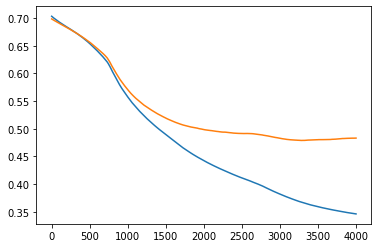

In [ ]:
from matplotlib import pyplot as plt

plt.plot(range(EPOCHS), history.history['loss'])
plt.plot(range(EPOCHS), history.history['val_loss'])
plt.show()

Vamos agora aplicar a rede aprendida na base de teste:

In [ ]:
features_data_test[numeric_columns] = (features_data_test[numeric_columns]-train_mean)/(train_std)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


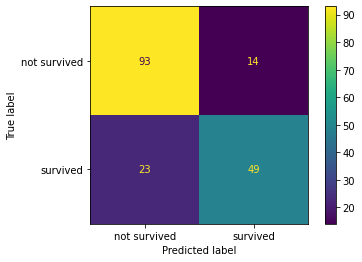

Taxa de acerto: 0.7932960893854749


In [ ]:
pred = model(features_data_test.to_numpy())
pred = np.argmax(pred, axis=-1)
real = np.argmax(labels_data_test.to_numpy(), axis=-1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(real, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["not survived", "survived"])
disp.plot()
plt.show()
print(f"Taxa de acerto: {np.sum(pred==real)/pred.shape[0]}")